In [144]:

import pandas as pd
import requests as req
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np
from IPython.display import display

beachID = '2'

resp = req.get('https://beachbackend.herokuapp.com/historical/{}'.format(beachID)) 

data = resp.json()






In [145]:
formattedData = []
from datetime import datetime, timedelta

for index, item in enumerate(data): 
  formattedData.append({
    '_id': item['_id'],
    'date': item['weather']['date'],
    'ecoli': item['beachReadings'][beachID]["eColi"],
    'name': item['beachReadings'][beachID]["eColi"],
    'totalPrecipitation': item['weather']['totalPrecipitation'],
    'temp': item['weather']['meanTemp'],
    "wind": item['weather']['speedOfMaxGust'],
  })

formattedData.reverse()

dataF = pd.DataFrame(data=data)

df = pd.DataFrame(data=formattedData, columns=['ecoli', 'totalPrecipitation', 'date'])
normDf = pd.DataFrame(data=formattedData, columns=['ecoli', 'totalPrecipitation', 'date'])

normDf['ecoli'] = (df['ecoli'] - df['ecoli'].min()) / (df['ecoli'].max() - df['ecoli'].min())
normDf['totalPrecipitation'] = (df['totalPrecipitation'] - df['totalPrecipitation'].min()) / (df['totalPrecipitation'].max() - df['totalPrecipitation'].min())


npDf = df.to_numpy()

In [162]:
dataWithPreviousDay = []

dateFormat = '%a, %d %b %Y %I:%M:%S %Z'

reversededData = data.reverse()

for index, item in enumerate(data): 
  if len(data) > index + 1:
    prevEntry = data[index - 1]
    currentDate = item['weather']['date']
    shouldBePreviousDate = datetime.strptime(currentDate, dateFormat) + timedelta(days=1)
    
    prevEntryDate = prevEntry['weather']['date']
    formattedPreviousEntryDate = datetime.strptime(prevEntryDate, dateFormat)




    if shouldBePreviousDate == formattedPreviousEntryDate:
      dataWithPreviousDay.append({
        '_id': item['_id'],
        'date': item['weather']['date'],
        'ecoli': item['beachReadings'][beachID]["eColi"],
        'name': item['beachReadings'][beachID]["eColi"],
        'totalPrecipitation': item['weather']['totalPrecipitation'],
        'previousDayPrecipitation': prevEntry['weather']['totalPrecipitation'],
        'temp': item['weather']['meanTemp'],
        "wind": item['weather']['speedOfMaxGust'],
      })



cleanedDf = pd.DataFrame(data=dataWithPreviousDay)



cleanedDf







,_id,date,ecoli,name,totalPrecipitation,previousDayPrecipitation,temp,wind
0,621784a096f2399dfa3a0026,"Sun, 05 Sep 2021 04:00:00 GMT",68.0,68.0,2.2,3.8,20.8,55.0
1,621784a096f2399dfa3a0027,"Sat, 04 Sep 2021 04:00:00 GMT",42.0,42.0,4.8,2.2,19.2,32.0
2,621784a096f2399dfa3a0028,"Fri, 03 Sep 2021 04:00:00 GMT",43.0,43.0,0.0,4.8,18.0,NaN
3,621784a096f2399dfa3a0029,"Thu, 02 Sep 2021 04:00:00 GMT",76.0,76.0,0.0,0.0,16.9,50.0
4,621784a096f2399dfa3a002a,"Wed, 01 Sep 2021 04:00:00 GMT",112.0,112.0,0.0,0.0,19.9,41.0
...,...,...,...,...,...,...,...,...
1358,621784a096f2399dfa3a0584,"Fri, 08 Jun 2007 04:00:00 GMT",106.0,106.0,5.4,0.0,22.5,96.0
1359,621784a096f2399dfa3a0585,"Thu, 07 Jun 2007 04:00:00 GMT",46.0,46.0,0.0,5.4,17.5,NaN
1360,621784a096f2399dfa3a0586,"Wed, 06 Jun 2007 04:00:00 GMT",172.0,172.0,0.0,0.0,13.0,32.0
1361,621784a096f2399dfa3a0587,"Tue, 05 Jun 2007 04:00:00 GMT",798.0,798.0,5.6,0.0,12.5,59.0


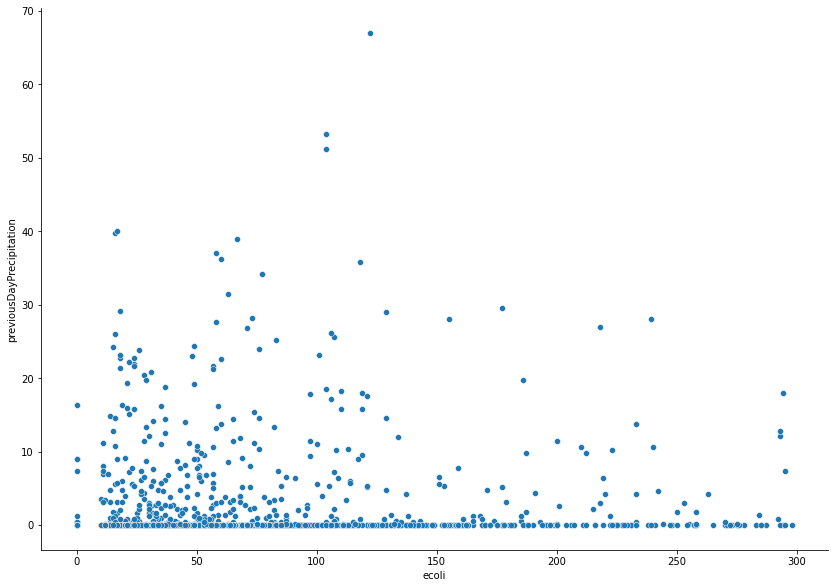

In [168]:


# sns.relplot(x="ecoli", y="totalPrecipitation", data=df[(df.ecoli > 0) & (df.ecoli < 400)  & (df.totalPrecipitation > 1)],   height=8.27, aspect=11.7 / 8.27)
# sns.relplot(x="ecoli", y="totalPrecipitation", data=normDf[(normDf.ecoli > 0) & (normDf.ecoli < 1)  & (normDf.totalPrecipitation > 0.1)],   height=8.27, aspect=11.7 / 8.27)

sns.relplot(x="ecoli", y="previousDayPrecipitation", data=cleanedDf[(cleanedDf.ecoli < 300)],   height=8.27, aspect=11.7 / 8.27)

